In [1]:
import pandas as pd

from libs.roc_curve import ROC_curve_binary_class_analysis
from libs.utils import change_label

In [2]:
# The dataset must include the columns ["Name", "Label"]
# Name is sample name
# Label is group name(class)

df_intensity = pd.read_csv('./data/dataset_filtered.csv')

df_intensity.head(3)

,Name,Label,0.5_201.8884,0.5_230.8912,0.51_170.9287,0.51_182.9633,0.51_214.9182,0.51_344.8764,0.52_125.9871,0.52_140.918,...,10.26_617.4752,10.33_617.4756,10.34_393.2981,10.4_756.5543,10.41_617.4755,10.41_618.4799,10.41_796.5461,10.41_804.5518,10.42_350.2677,10.44_401.342
0,A28,Control,1079.5972,3364.987,8013.412,13777.28,345581.7,13184.68,3529.62868,1550.343,...,4078.967,0.0000,0.000000,0.0,573.2535,0.0000,0.000000,11.078637,247.644689,0.0
1,A29,Control,1047.1632,2062.431,7226.280,17603.75,343324.0,12054.90,3266.07968,1093.470,...,7574.451,513.8083,0.000000,0.0,1104.6180,126.5826,795.170393,16679.565437,410.276589,0.0
2,A30,Control,978.7220,1033.370,8414.276,17165.03,367166.3,14203.08,3107.84768,1569.953,...,12570.470,1549.3030,213.668596,0.0,870.0868,0.0000,0.000000,36191.855437,0.000000,0.0


In [3]:
# This ROC analysis proceeds using basic logisitic regression model as an estimator
# Only binary class analysis is possible...
# Label must be converted to 0 or 1

# select only two groups (eg, Severe and Control)
df_rev = df_intensity[df_intensity.Label.isin(['Severe', 'Control'])].reset_index(drop=True)

# Label change
df_rev = change_label(df_rev, {'Severe' :1, 'Control': 0})

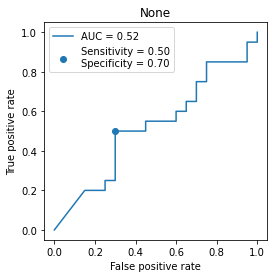

In [4]:
ROC_curve_binary_class_analysis(
    dataset=df_rev,
    features='0.5_201.8884',
    features_name=None,
    is_save_file=False
)

In [5]:
# If key features are selected and you want to analyze ROC-curve at once...
# this is an example of roc analysis of them grouped by "ID_group"

# selected features dataset
df_key_features = pd.read_excel('./data/example_metabolite_ID.xlsx')

# np.ndarray (or list) of features 
oxPC = df_key_features[df_key_features.ID_group == 'oxPC'].Features.values

# np.ndarray (or list) of features name(ID)
oxPC_id = df_key_features[df_key_features.ID_group == 'oxPC'].ID.values

df_key_features.head(3)

,Features,mz,ID,ID_group
0,2.24_132.0663,132.0663,Hydroxyproline,AA
1,2.63_132.1033,132.1033,Leucine,AA
2,2.5_118.066,118.0660,Indole,indole


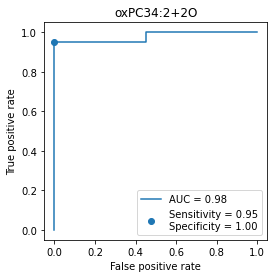

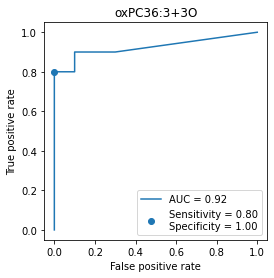

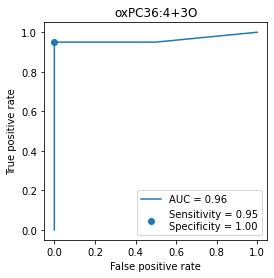

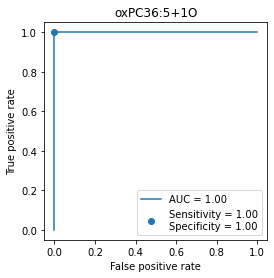

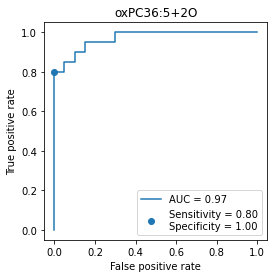

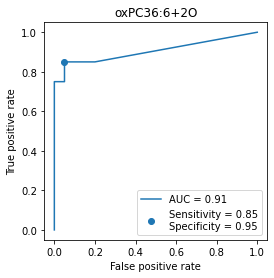

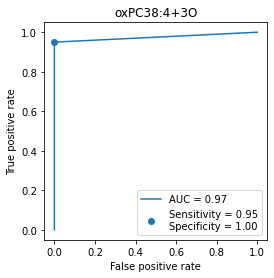

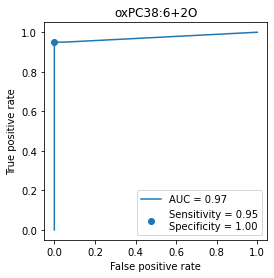

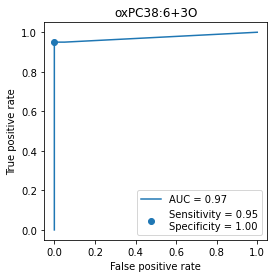

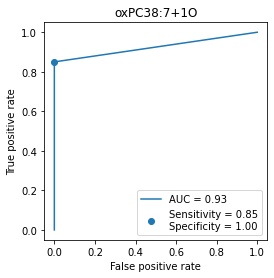

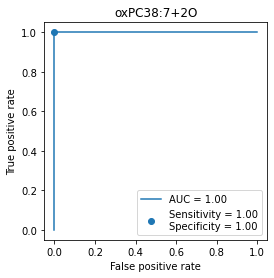

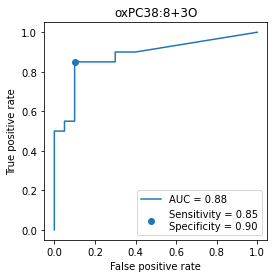

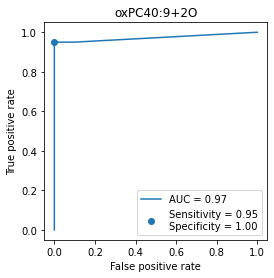

In [6]:
for feat, name in zip(oxPC, oxPC_id):
    ROC_curve_binary_class_analysis(df_rev, feat, name)